# lighteval is your AI evaluation library

This notebook explores how you can use lighteval to evaluate and compare LLMs.

`lighteval` has been around a while and it's a great tool for getting eval score on major benchmarks. It's just been refactored to support being used like a library in Python, which makes it great for comparing models across benchmarks.

So let's dig in to some eval scores.

<div style='background-color: lightblue; padding: 10px; border-radius: 5px; margin-bottom: 20px; color:black'>
    <h2 style='margin: 0;color:blue'>Exercise: Evaluate Your Own Model</h2>
    <p>Now that you've seen how to evaluate models on specific domains, try evaluating a model on a domain that interests you.</p>
    <p><b>Difficulty Levels</b></p>
    <p>🐢 Use the existing medical domain tasks but evaluate a different model from the Hugging Face hub</p>
    <p>🐕 Create a new domain evaluation by selecting different MMLU tasks (e.g., computer science, mathematics, physics)</p>
    <p>🦁 Create a custom evaluation task using LightEval's task framework and evaluate models on your specific domain</p>
</div>

## Install dependencies

In [ ]:
!pip install -qqq -U "torch<2.5" "torchvision<2.5" "torchaudio<2.5" --index-url https://download.pytorch.org/whl/cu121
!pip list | grep torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.0/799.0 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -qqq git+https://github.com/huggingface/lighteval.git tiktoken

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Setup `lighteval` evaluation

We need to setup the evaluation environment and pipeline. Much of this we will disable because we're keeping things in the notebook, but we could also use `push_to_hub` or `push_to_tensorboard`.

### `push_to_hub`

This is useful if we're evaluating a model and want to persist its evaluation with weights and configuration on the Hugging Face hub.

### `push_to_tensorboard`

This would be useful if we were building an evaluation tool or script, where we wanted to view results within tensorboard.

In [20]:
import lighteval
import os
from datetime import timedelta
from transformers import AutoModelForCausalLM

from lighteval.logging.evaluation_tracker import EvaluationTracker
# from lighteval.logging.hierarchical_logger import hlog_warn, htrack
# from lighteval.models.model_config import create_model_config

from lighteval.pipeline import EnvConfig, ParallelismManager, Pipeline, PipelineParameters

TOKEN = os.getenv("HF_TOKEN")

In [21]:
env_config = EnvConfig(token=TOKEN, cache_dir="~/tmp")

evaluation_tracker = EvaluationTracker(
    output_dir="~/tmp",
    save_details=False,
    push_to_hub=False,
    push_to_tensorboard=False,
    public=False,
    hub_results_org=False,
)

pipeline_params = PipelineParameters(
    launcher_type=ParallelismManager.ACCELERATE,
    env_config=env_config,
    job_id=1,
    override_batch_size=1,
    num_fewshot_seeds=0,
    max_samples=10,
    use_chat_template=False,
)

# Compares models with `lighteval`

We are going to compare two small LLMs on a domain. We will use `Qwen2.5-0.5B` and `SmolLM2-360M-Instruct` and we will evaluate them on a medical domain.

We can create a domain evaluation from a subset of MMLU evaluations, by defining the evaluation tasks. In lighteval, tasks are described as strings.

`{suite}|{task}:{subtask}|{num_few_shot}|{0 or 1 to reduce num_few_shot if prompt is too long}`

Therefore, we will pass our list of medicine related tasks like this:

```
"leaderboard|mmlu:anatomy|5|0,leaderboard|mmlu:professional_medicine|5|0,leaderboard|mmlu:high_school_biology|5|0,leaderboard|mmlu:high_school_chemistry|5|0"
```

Which can be translated to :

| Suite | Task | Num Fewshot Example | Limit Fewshots |
|---|---|---|---|
| leaderboard | mmlu:anatomy | 5 | False |
| leaderboard | mmlu:professional_medicine | 5 | False |
| leaderboard | mmlu:high_school_biology | 5 | False |
| leaderboard | mmlu:high_school_chemistry | 5 | False |

For a full list of lighteval supported tasks. Checkout this page in [the documentation](https://github.com/huggingface/lighteval/wiki/Available-Tasks).

In [22]:
domain_tasks = "leaderboard|mmlu:anatomy|5|0,leaderboard|mmlu:professional_medicine|5|0,leaderboard|mmlu:high_school_biology|5|0,leaderboard|mmlu:high_school_chemistry|5|0"

# Evaluate Qwen2.5 0.5B

In [23]:
qwen_model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2.5-0.5B")

pipeline = Pipeline(
    tasks=domain_tasks,
    pipeline_parameters=pipeline_params,
    evaluation_tracker=evaluation_tracker,
    model=qwen_model
)

pipeline.evaluate()

qwen_results = pipeline.get_results()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/681 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/39.7k [00:00<?, ?B/s]

mmlu.py:   0%|          | 0.00/5.76k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/47.5M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/5.28k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/3.50k [00:00<?, ?B/s]

Generating auxiliary_train split:   0%|          | 0/99842 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/135 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/14 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

0000.parquet:   0%|          | 0.00/62.7k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/4.94k [00:00<?, ?B/s]

Generating auxiliary_train split:   0%|          | 0/99842 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/310 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/32 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

0000.parquet:   0%|          | 0.00/33.3k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/8.31k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/4.16k [00:00<?, ?B/s]

Generating auxiliary_train split:   0%|          | 0/99842 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/203 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/22 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

0000.parquet:   0%|          | 0.00/125k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/8.45k [00:00<?, ?B/s]

Generating auxiliary_train split:   0%|          | 0/99842 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/272 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/31 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (334 > 20). Running this sequence through the model will result in indexing errors
0it [00:00, ?it/s]
100%|██████████| 40/40 [00:01<00:00, 22.85it/s]
1it [00:01,  1.76s/it]
100%|██████████| 40/40 [00:01<00:00, 33.88it/s]
2it [00:02,  1.42s/it]
100%|██████████| 40/40 [00:01<00:00, 33.66it/s]
3it [00:04,  1.32s/it]
100%|██████████| 40/40 [00:01<00:00, 33.27it/s]
4it [00:05,  1.34s/it]


# Evaluate SmolLM 360M

In [24]:
smol_model = AutoModelForCausalLM.from_pretrained("HuggingFaceTB/SmolLM2-360M-Instruct")

pipeline = Pipeline(
    tasks=domain_tasks,
    pipeline_parameters=pipeline_params,
    evaluation_tracker=evaluation_tracker,
    model=smol_model
)

pipeline.evaluate()

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/724M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (341 > 20). Running this sequence through the model will result in indexing errors
0it [00:00, ?it/s]
100%|██████████| 40/40 [00:01<00:00, 27.11it/s]
1it [00:01,  1.48s/it]
100%|██████████| 40/40 [00:01<00:00, 27.20it/s]
2it [00:02,  1.48s/it]
100%|██████████| 40/40 [00:01<00:00, 27.42it/s]
3it [00:04,  1.47s/it]
100%|██████████| 40/40 [00:02<00:00, 19.77it/s]
4it [00:06,  1.61s/it]


In [25]:
smol_results = pipeline.get_results()

In [26]:
pipeline.show_results()

|                  Task                  |Version|Metric|Value |   |Stderr|
|----------------------------------------|------:|------|-----:|---|-----:|
|all                                     |       |acc   |0.3333|±  |0.1169|
|leaderboard:mmlu:_average:5             |       |acc   |0.3400|±  |0.1121|
|leaderboard:mmlu:anatomy:5              |      0|acc   |0.4500|±  |0.1141|
|leaderboard:mmlu:high_school_biology:5  |      0|acc   |0.1500|±  |0.0819|
|leaderboard:mmlu:high_school_chemistry:5|      0|acc   |0.3500|±  |0.1094|
|leaderboard:mmlu:professional_medicine:5|      0|acc   |0.4500|±  |0.1141|



# Visualize Results

Now that we have results from the two models we can visualize them side-by-side. We'll keep visualisation simple here, but with this data structure you could represent scores in many ways.

<Axes: >

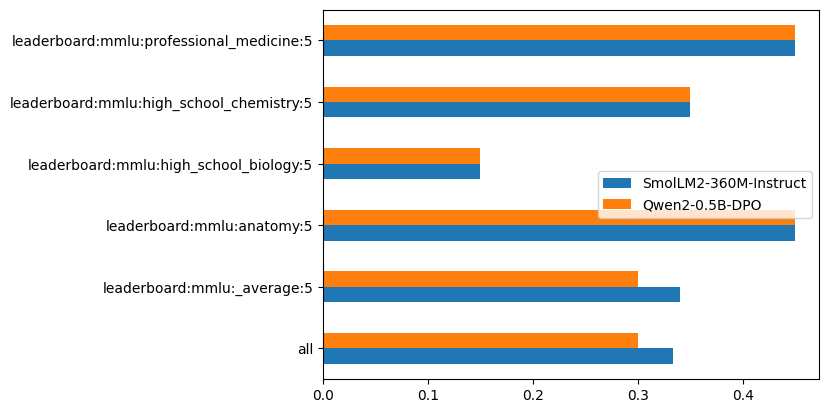

In [27]:
import pandas as pd

df = pd.DataFrame.from_records(smol_results["results"]).T["acc"].rename("SmolLM2-360M-Instruct")
_df = pd.DataFrame.from_records(qwen_results["results"]).T["acc"].rename("Qwen2-0.5B-DPO")
df = pd.concat([df, _df], axis=1)
df.plot(kind="barh")

# 💐 That's it!

You have a handy notebook to view model evals. You could use this to:

- select the right model for your inference use case
- evaluate checkpoints during training
- share model scores

🏃Next Steps

- If you want to go deeper into your evaluation results check out this [notebook](https://github.com/huggingface/evaluation-guidebook/blob/main/contents/examples/comparing_task_formulations.ipynb)
